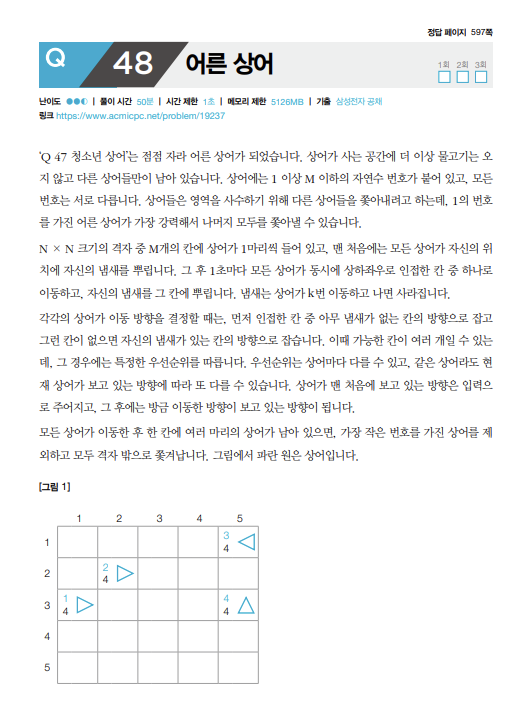

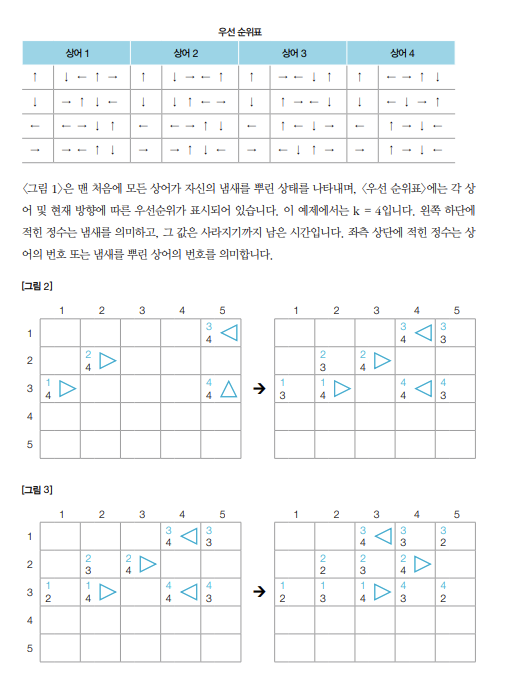

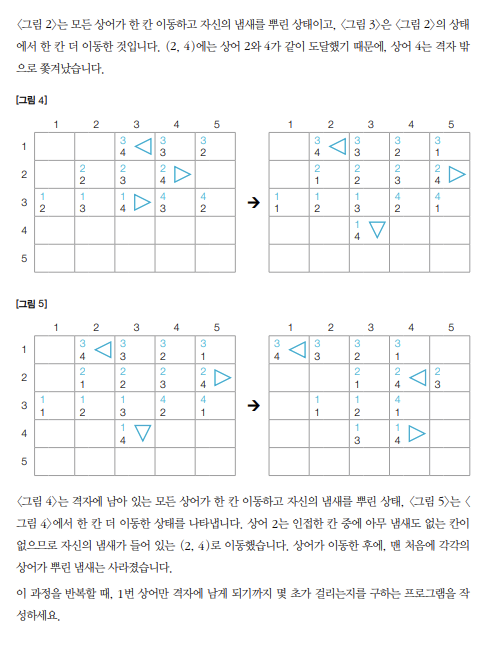

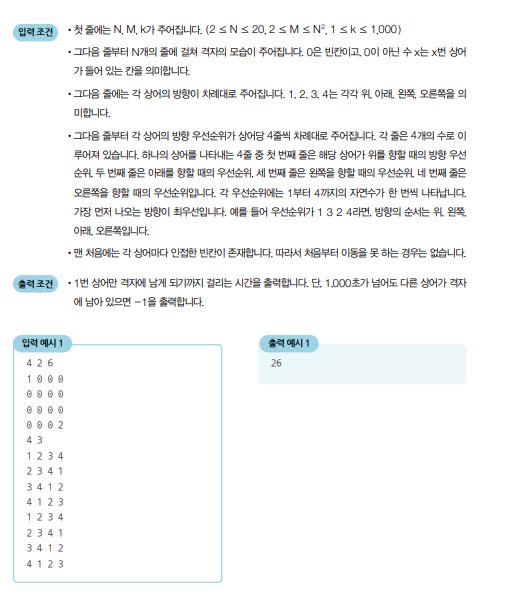

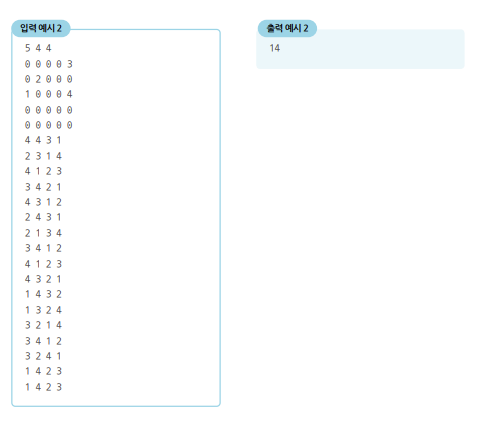

## 답안ver

In [ ]:
n, m, k = map(int, input().split())

# 모든 상어의 위치와 방향 정보를 포함하는 2차원 리스트
array = []
for i in range(n):
    array.append(list(map(int, input().split())))

# 모든 상어의 현재 방향 정보
directions = list(map(int, input().split()))

# 각 위치마다 [특정 냄새의 상어 번호, 특정 냄새의 남은 시간]을 저장하는 2차원 리스트
smell = [[[0, 0]] * n for _ in range(n)]

# 각 상어의 회전 우선순위 정보
priorities = [[] for _ in range(m)]
for i in range(m):
    for j in range(4):
        priorities[i].append(list(map(int, input().split())))

# 특정 위치에서 이동 가능한 4가지 방향
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# 모든 냄새 정보를 업데이트
def update_smell():
    # 각 위치를 하나씩 확인하며
    for i in range(n):
        for j in range(n):
            # 냄새가 존재하는 경우, 시간을 1만큼 감소시키기
            if smell[i][j][1] > 0:
                smell[i][j][1] -= 1
            # 상어가 존재하는 해당 위치의 냄새를 k로 설정
            if array[i][j] != 0:
                smell[i][j] = [array[i][j], k]

# 모든 상어를 이동시키는 함수
def move():
    # 이동 결과를 담기 위한 임시 결과 테이블 초기화
    new_array = [[0] * n for _ in range(n)]
    # 각 위치를 하나씩 확인하며
    for x in range(n):
        for y in range(n):
            # 상어가 존재하는 경우
            if array[x][y] != 0:
                direction = directions[array[x][y] - 1] # 현재 상어의 방향
                found = False
                # 일단 냄새가 존재하지 않는 곳이 있는지 확인
                for index in range(4):
                    nx = x + dx[priorities[array[x][y] - 1][direction - 1][index] - 1]
                    ny = y + dy[priorities[array[x][y] - 1][direction - 1][index] - 1]
                    if 0 <= nx and nx < n and 0 <= ny and ny < n:
                        if smell[nx][ny][1] == 0: # 냄새가 존재하지 않는 곳이면
                            # 해당 상어의 방향 이동시키기
                            directions[array[x][y] - 1] = priorities[array[x][y] - 1][direction - 1][index]
                            # 상어 이동시키기 (만약 이미 다른 상어가 있다면 번호가 낮은 것이 들어가도록)
                            if new_array[nx][ny] == 0:
                                new_array[nx][ny] = array[x][y]
                            else:
                                new_array[nx][ny] = min(new_array[nx][ny], array[x][y])
                            found = True
                            break
                if found:
                    continue
                # 주변에 모두 냄새가 남아 있다면, 자신의 냄새가 있는 곳으로 이동
                for index in range(4):
                    nx = x + dx[priorities[array[x][y] - 1][direction - 1][index] - 1]
                    ny = y + dy[priorities[array[x][y] - 1][direction - 1][index] - 1]
                    if 0 <= nx and nx < n and 0 <= ny and ny < n:
                        if smell[nx][ny][0] == array[x][y]: # 자신의 냄새가 있는 곳이면
                            # 해당 상어의 방향 이동시키기
                            directions[array[x][y] - 1] = priorities[array[x][y] - 1][direction - 1][index]
                            # 상어 이동시키기
                            new_array[nx][ny] = array[x][y]
                            break
    return new_array

time = 0
while True:
    update_smell() # 모든 위치의 냄새를 업데이트
    new_array = move() # 모든 상어를 이동시키기
    array = new_array # 맵 업데이트
    time += 1 # 시간 증가

    # 1번 상어만 남았는지 체크
    check = True
    for i in range(n):
        for j in range(n):
            if array[i][j] > 1:
                check = False
    if check:
        print(time)
        break

    # 1000초가 지날 때까지 끝나지 않았다면
    if time >= 1000:
        print(-1)
        break

https://velog.io/@koyo/boj-19237

In [ ]:
n, m, k = map(int, input().split())

# 처음상어 위치
data = []
for _ in range(n):
    data.append(list(map(int, input().split())))


shark = [[0,0] for _ in range(m)]

# 상어의 초기 방향 정해주기
directions = list(map(int, input().split()))

# 상어의 방향별 우선순위 받아오기(위 아래 왼쪽 오른쪽)
priorities = []
for i in range(m):
    temp = []
    for _ in range(4):
        temp.append(list(map(int, input().split())))
    priorities.append(temp)

dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# 상황판 그리기(상어번호, 냄새가 머무는 시간, 방향)
smell = [[[0, 0]] * n for _ in range(n)]

# 모든 냄새 정보 업데이트
def update_smell():
    for i in range(n):
        for j in range(n):
            # 냄새가 남아있는 경우
            if smell[i][j][1] > 0:
                smell[i][j][1] -= 1
            # 상어가 존재하는 위치의 경우
            if data[i][j] != 0:
                smell[i][j] = [data[i][j], k]


# 상어 이동
def move():
    new_data = [[0] * n for _ in range(n)]
    for x in range(n):
        for y in range(n):
            if data[x][y] != 0:
                direction = directions[data[x][y] - 1]
                found = False
                # 상어의 위치인 경우
                for idx in priorities[data[x][y] - 1][direction - 1]:
                    nx = x + dx[idx - 1]
                    ny = y + dy[idx - 1]
                    if 0 <= nx < n and 0 <= ny < n:
                        if smell[nx][ny][1] == 0: # 냄새가 나지 않는 곳이라면
                            directions[data[x][y] - 1] = idx
                            # 상어 이동시키기
                            if new_data[nx][ny] == 0:
                                new_data[nx][ny] = data[x][y]
                            else :
                                new_data[nx][ny] = min(data[x][y], new_data[nx][ny])
                            found = True
                            break
                if found:
                    continue

                # 주변에 모두 냄새가 남아있다면, 자신의 냄새가 있는 곳으로 이동
                for idx in priorities[data[x][y] - 1][direction - 1]:
                    nx = x + dx[idx - 1]
                    ny = y + dy[idx - 1]
                    if 0 <= nx < n and 0 <= ny < n:
                        if smell[nx][ny][0] == data[x][y]: # 자신의 냄새가 있는 곳이라면
                            # 해당 상어 방향 변경
                            directions[data[x][y] - 1] = idx
                            # 상어 이동시키기
                            new_data[nx][ny] = data[x][y]
                            break
    return new_data

answer = 0
while True:
    update_smell()
    new_data = move()
    data = new_data
    answer += 1

    check = True
    for i in range(n):
        for j in range(n):
            if data[i][j] > 1:
                check = False
    if check:
        print(answer)
        break

    # 1000초가 지날 때까지 끝나지 않았다면
    if answer >= 1000:
        print(-1)
        break